**The objective of this question is to analyze network structures using a random weighted directed graph. The graph data is stored in a CSV file named “random graph edges.csv”, which contains the edges of
the graph along with their weights.**

**(a)** mplement a function that reads the graph data from the CSV file and generates a network visualization where:
* The nodes are displayed with labels.
* The edges are directed, and their thickness corresponds to the weight of the edge.
* Edge weights are displayed as labels on the edges

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

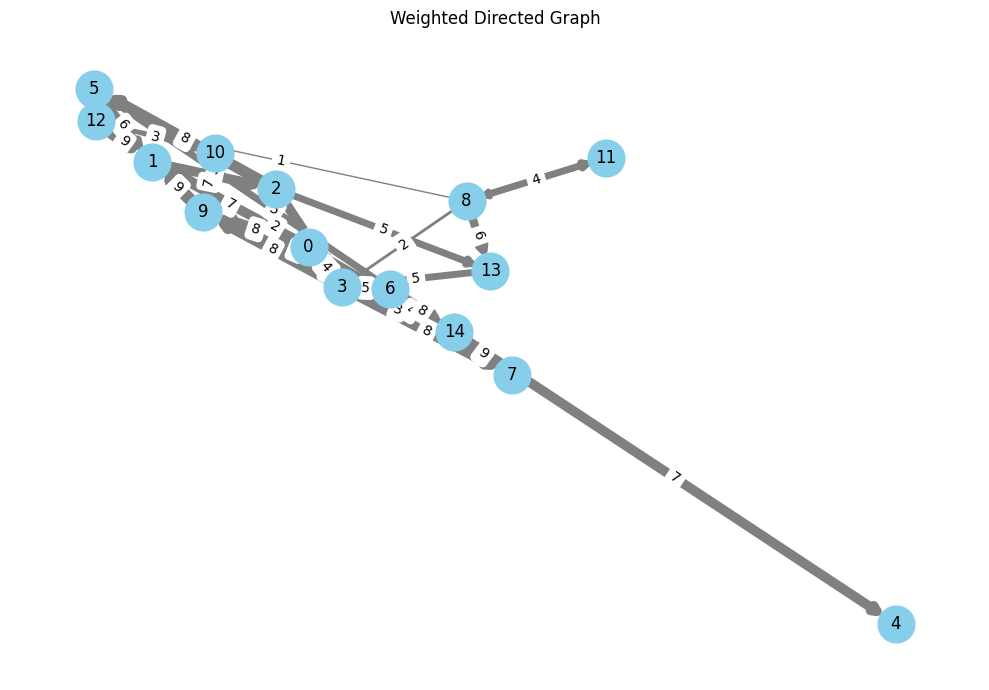

In [14]:
def visualize_weighted_graph(csv_path):
    edges_df = pd.read_csv(csv_path)
    graph_obj = nx.DiGraph()

    row_index = 0
    while row_index < len(edges_df):
        source_node = edges_df.loc[row_index, 'source']
        target_node = edges_df.loc[row_index, 'target']
        edge_weight = edges_df.loc[row_index, 'weight']
        graph_obj.add_edge(source_node, target_node, weight=edge_weight)
        row_index += 1

    layout_pos = nx.spring_layout(graph_obj, seed=42)
    edge_weights = [graph_obj[u][v]['weight'] for u, v in graph_obj.edges()]
    edge_labels = nx.get_edge_attributes(graph_obj, 'weight')

    plt.figure(figsize=(10, 7))
    nx.draw_networkx_nodes(graph_obj, layout_pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(graph_obj, layout_pos)
    nx.draw_networkx_edges(graph_obj, layout_pos, width=edge_weights, arrows=True, edge_color='gray')
    nx.draw_networkx_edge_labels(graph_obj, layout_pos, edge_labels=edge_labels, font_color='black')

    plt.title("Weighted Directed Graph")
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig(outfile_name)
    plt.show()

avg_deg = visualize_weighted_graph("random_graph_edges.csv")


**(b)** Implement a function that performs community detection on the graph using the Girvan-Newman algorithm and visu-
alizes the top 3 communities with different colors 

C:\Users\hp\AppData\Local\Temp\ipykernel_7828\2592480327.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


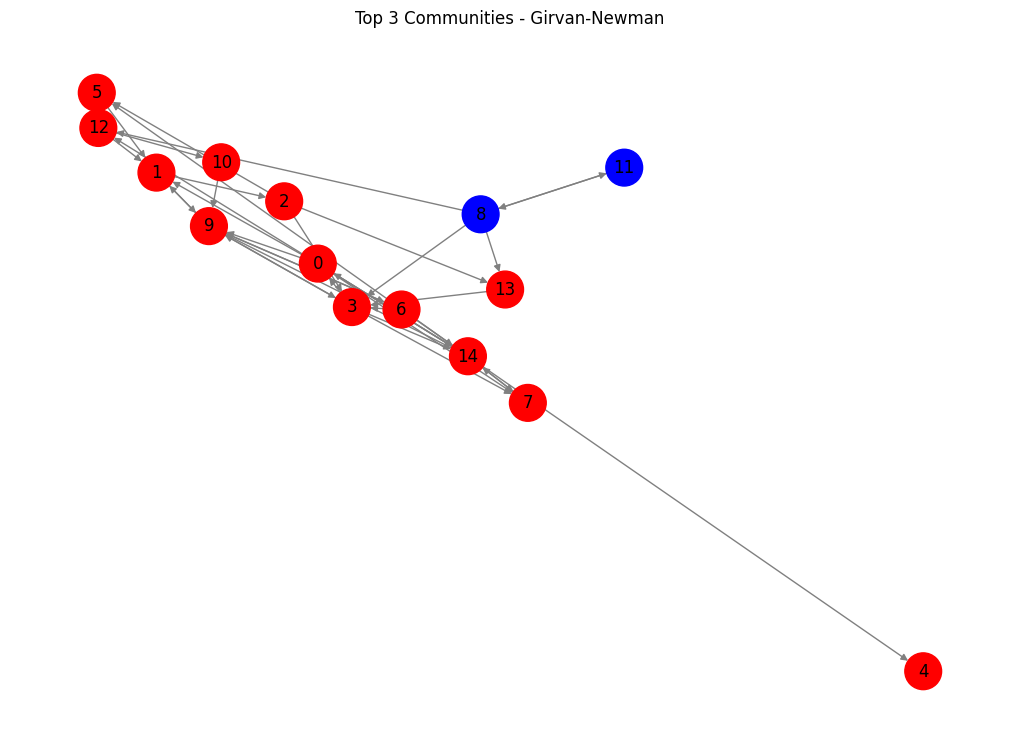

In [15]:
def detect_and_visualize_communities(file_path):
    edge_data = pd.read_csv(file_path)
    directed_graph = nx.DiGraph()

    line_idx = 0
    while line_idx < len(edge_data):
        row = edge_data.loc[line_idx]
        directed_graph.add_edge(row['source'], row['target'], weight=row['weight'])
        line_idx += 1

    undirected_graph = directed_graph.to_undirected()

    comm_gen = girvan_newman(undirected_graph)
    communities = list(next(comm_gen))  
    top_3 = [sorted(list(c)) for c in sorted(communities, key=len, reverse=True)[:3]]

    color_map = {}
    color_list = ['red', 'blue', 'green']
    for i in range(len(top_3)):
        for node in top_3[i]:
            color_map[node] = color_list[i]

    node_colors = [color_map.get(node, 'gray') for node in directed_graph.nodes()]

    pos_layout = nx.spring_layout(directed_graph, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(directed_graph, pos=pos_layout, with_labels=True,
            node_color=node_colors, edge_color='gray', node_size=700,
            arrows=True)

    plt.title("Top 3 Communities - Girvan-Newman")
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig(outfile_name)
    plt.show()

communities = detect_and_visualize_communities("random_graph_edges.csv")
